<a href="https://colab.research.google.com/github/thescriptninja/graduate-admissions/blob/master/GREvsCGPA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
url = 'https://raw.githubusercontent.com/thescriptninja/graduate-admissions/master/Admission_Predict.csv'

dataset = pd.read_csv(url)

In [0]:
cgpa = dataset["CGPA"]
gre = dataset["GRE Score"]
def predict(cgpa, weight, bias):
    return cgpa*weight + bias
  
def calc_mse(cgpa, gre, weight, bias):
    num_students = len(cgpa)
    total_err = 0.0
    for i in range(num_students):
        total_err += (gre[i] - (weight*cgpa[i] + bias))*(gre[i] - (weight*cgpa[i] + bias))
    return total_err/num_students
  
def update_weights(cgpa, gre, weight, bias, learning_rate):
    w_der = 0.0
    b_der = 0.0
    num_students = len(cgpa)
    for i in range(num_students):
        w_der += -2*cgpa[i]*(gre[i]-(weight*cgpa[i] + bias))
        b_der += -2*(gre[i]-(weight*cgpa[i] + bias))
        
    weight = weight - (w_der/num_students)*learning_rate
    bias = bias - (b_der/num_students)*learning_rate
    return weight, bias

def train(cgpa, gre, weight, bias, learning_rate, reps):
    for i in range(reps):
        err = calc_mse(cgpa, gre, weight, bias)
        weight, bias = update_weights(cgpa, gre, weight, bias, learning_rate)
        print("iter: {} error: {:.2f} weight: {:.4f} bias: {:.4f}\n".format(i, err, weight, bias))
        
    return weight, bias
  
weight, bias = train(cgpa, gre, 33.42, 28.63, 0.01, 8000)

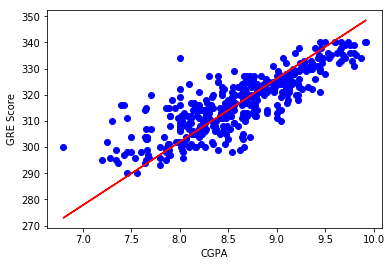

In [25]:
trained_gre = [element*weight + bias for element in cgpa]
plt.scatter(cgpa, gre, color = 'blue')
plt.plot(cgpa, trained_gre, color = 'red')
plt.xlabel('CGPA')
plt.ylabel('GRE Score')
plt.show()